In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [46]:
#a mapping dictionary that maps the quality values from 0 to 6
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
    9: 6
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:,"quality"] = df.quality.map(quality_mapping)


In [47]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3


In [48]:
df.shape

(6497, 13)

In [49]:
#use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)
#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [50]:
df_train.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [51]:
df_train = df_train[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]

In [52]:
df_test = df_test[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]

In [53]:
df_train.shape

(1000, 12)

In [54]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [60]:
#lets train a model on training set
#import from scikit-learn
from sklearn import tree
from sklearn import metrics
import seaborn as sns

In [56]:
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols],df_train.quality)
# generate prediction on train set
train_predictions = clf.predict(df_train[cols])
#generate prediction on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)


In [57]:
print("training accuracy: ", train_accuracy)
print("testing accuracy: ", test_accuracy)

training accuracy:  0.5521042084168337
testing accuracy:  0.5


In [58]:
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols],df_train.quality)
# generate prediction on train set
train_predictions = clf.predict(df_train[cols])
#generate prediction on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)


In [59]:
print("training accuracy: ", train_accuracy)
print("testing accuracy: ", test_accuracy)

training accuracy:  0.748496993987976
testing accuracy:  0.5134680134680135


Text(0, 0.5, 'count')

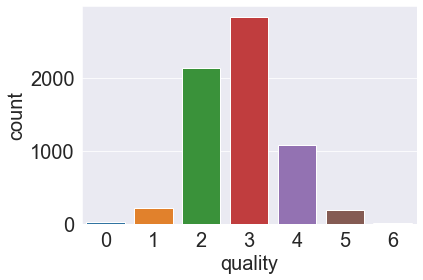

In [61]:
g = sns.countplot(x="quality",data=df)
g.set_xlabel("quality",fontsize=20)
g.set_ylabel("count",fontsize=20)

In [36]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#this is our global size of label text on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)


In [38]:
%matplotlib inline

In [39]:
#inintialize accuracies
train_acc = [0.5]
test_acc = [0.5]


In [40]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    
    

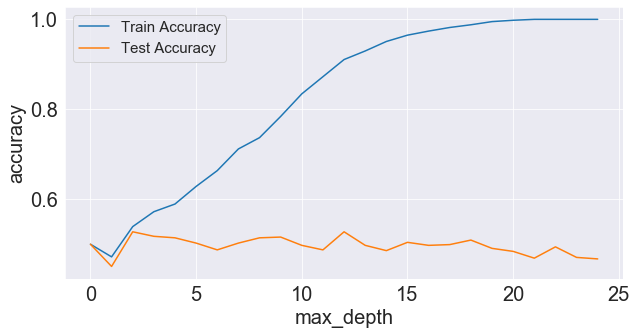

In [41]:
#create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.plot(train_acc,label="Train Accuracy")
plt.plot(test_acc,label="Test Accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [42]:
def _kfold(fileName):
    import pandas as pd
    from sklearn import model_selection
    # Training data is in a CSV file called train.csv
    df = pd.read_csv(fileName)
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv with kfold column 
    df.to_csv("train_folds.csv", index=False)

## Cross Validation Methods :-


* k-fold cross-validation
* stratified k-fold cross-validation
* hold-out based cross validation
* leave-one-out cross validation
* group k-fold cross-validation

#  1. k-fold cross validation 

* what is k-fold ?

        To build a machine learning models, you separate them into two different sets: training and validation.
        We can divide the data into k different sets which are exclusive of each other. this is known as k-fold cross validation.
        
* where to implement ?
         
         if dataset is not skewed then you can use it. But if data is sckewed then you have to go for stratified k-fold.
         for example :- Let's consider a problem if we have a dataset of moview reviews and out of them 50% are positive and 50% are negative the dataset is not skewed so we can use k-fold cross validation methos.
* how to implement ?
        
        we can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.
        

In [62]:
def _kfold(fileName):
    import pandas as pd
    from sklearn import model_selection
    # Training data is in a CSV file called train.csv
    df = pd.read_csv(fileName)
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv with kfold column 
    df.to_csv("train_folds.csv", index=False)

In [184]:
import pandas as pd
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [185]:
df = pd.read_csv('train.csv')
df["kfold"] = -1

In [186]:
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
5698,red,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4,5,-1
4796,white,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,-1
2543,white,6.5,0.230,0.25,17.3,0.046,15.0,110.0,0.99828,3.15,0.42,9.2,6,-1
1383,white,7.1,0.360,0.56,1.3,0.046,25.0,102.0,0.99230,3.24,0.33,10.5,6,-1
702,white,6.6,0.380,0.18,1.2,0.042,20.0,84.0,0.99270,3.22,0.45,10.1,4,-1


In [187]:
number_of_splits = 20
kf = model_selection.KFold(n_splits=number_of_splits)
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [188]:
df.dropna(inplace=True)
df.drop(["type"],axis=1,inplace=True)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
5698,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4,5,17
4796,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,14
2543,6.5,0.230,0.25,17.3,0.046,15.0,110.0,0.99828,3.15,0.42,9.2,6,7
1383,7.1,0.360,0.56,1.3,0.046,25.0,102.0,0.99230,3.24,0.33,10.5,6,4
702,6.6,0.380,0.18,1.2,0.042,20.0,84.0,0.99270,3.22,0.45,10.1,4,2


In [194]:
df_test
df_train
acc=[]
for i in range (0,number_of_splits):
    # seperate validation and training data
    # training data exclude bin with kfold=i
    # validation data include only bin with kfold=i
    df_validation = df[df['kfold'].apply(lambda x: x==i)]
    df_train = df[df['kfold'].apply(lambda x: x!=i)]
    # X_train
    X_train = df_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
    # target value in y_train
    y_train = df_train['quality']
    # X_validation 
    X_validation =  df_validation[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
    # y_validation
    y_validation = df_validation['quality']
    # decidion tree model
    model = DecisionTreeClassifier()
    #fit the data
    model.fit(X_train,y_train)
    y_pred = model.predict(X_validation)
    acc.append(accuracy_score(y_validation, y_pred))
    
    

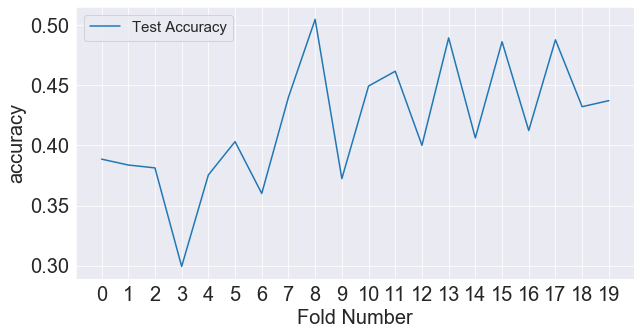

In [195]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.plot(acc,label="Test Accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0, 20,1))
plt.xlabel("Fold Number", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [131]:
df_train.kfold.unique()

array([6, 3, 7, 1, 8, 2, 0, 4, 5], dtype=int64)